Here we will explore a couple of different clustering algorithms and understand the impact of various hyperparameters.

In [3]:
# Imports
import numpy as np
from sklearn.cluster import KMeans
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import AgglomerativeClustering

We'll be using the MNIST digits data because it is easy to understand and visualize.  The code below loads the raw data where each instance is a 28x28 grayscale image represented as a vector of 784 integers between 0 and 255.

It also loads the digits (0-9) to which each image corresponds.  

# Task 0: Get the data

mnist_labels.txt

mnist_data.txt

Put the two files above in the same director as this notebook.

In [4]:
X = [np.array(list(map(int, x.split()))) for x in open('mnist_data.txt').readlines()]
y = [int(y.strip()) for y in open('mnist_labels.txt').readlines()]

In [5]:
# Check to ensure that X and y are the same length
print(len(X))
print(len(y))

10000
10000


In [6]:
def plot_digit(digit):
    "Visualize a digit or a cluster centroid"

    plt.imshow(digit.reshape((28,28)), cmap='gray')
    plt.show()

The digit is 8


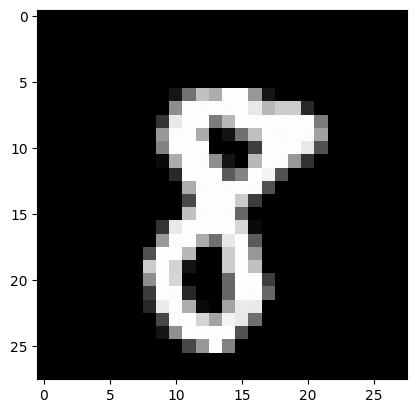

In [7]:
# You can run this cell multiple times to see different digit examples
idx = random.randrange(len(X))
print("The digit is %d" % y[idx])
plot_digit(X[idx])

# Task 1: Get familiar with running k-means

In [8]:
# Create a KMeans object with 5 clusters and random point selection
# for cluster initialization

clst = KMeans(n_clusters = 5, init = 'random')

In [9]:
# Cluster the data
clst.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=5)

In [10]:
def get_cm(clst, y):
    """
    Given a cluster object that has been fit and the true labels for the data
    return a confusion matrix where cell (i, j) is the number of times true
    class label j occurs in cluster i.
    """

    cm = np.zeros((np.unique(clst.labels_).shape[0], np.unique(y).shape[0]))

    for ypred, ytrue in zip(clst.labels_, y):
        cm[ypred][ytrue] += 1

    return cm

In [11]:
def plot_cm(cm):
    "Plot a confusion matrix"

    s = sns.heatmap(cm, cmap="GnBu", annot=True, fmt='g')
    s.set(xlabel='Digit', ylabel='Cluster')
    return s

In [12]:
# Get the confusion matrix for the 10 cluster case
cm = get_cm(clst, y)

It's hard to tell what you'll see below due to randomness, but typically there is one cluster with almost all of the 0's.  Find the row for which the 0 column has a very high count.  There is also typically a column that has most of the 1's.  The 4's, 7's, and 8's tend to clump into one cluster.  Look for the row that has high counts for those columns.

<Axes: xlabel='Digit', ylabel='Cluster'>

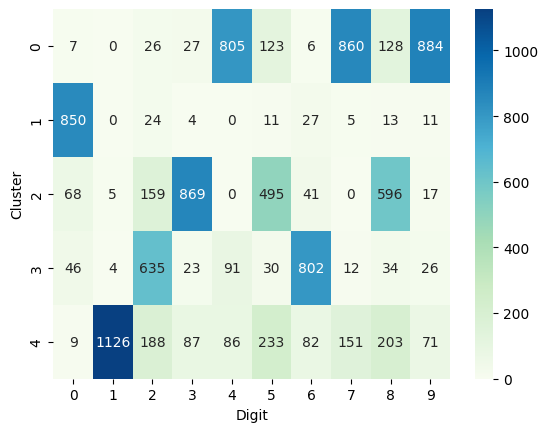

In [13]:
plot_cm(cm)

Cluster ID 0 centroid


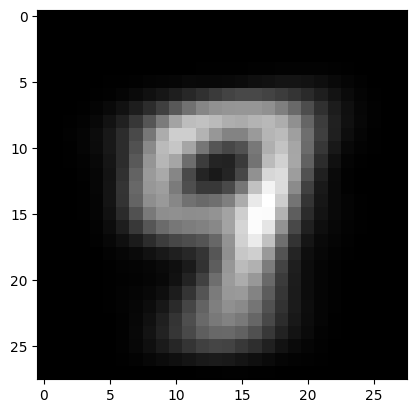

Cluster ID 1 centroid


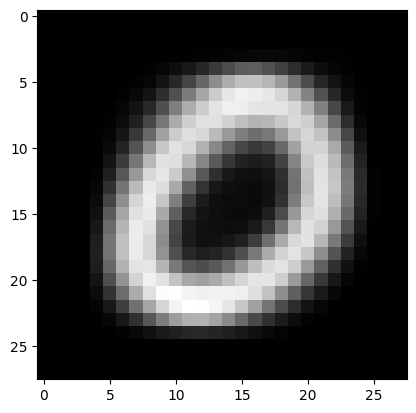

Cluster ID 2 centroid


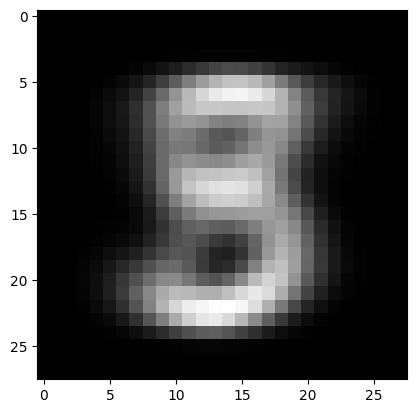

Cluster ID 3 centroid


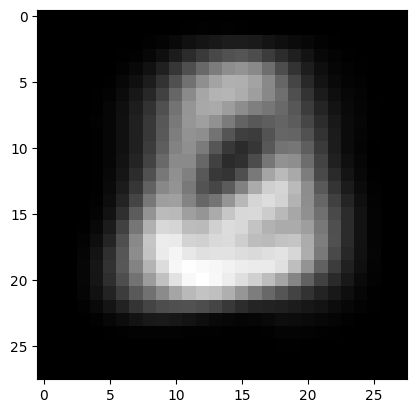

Cluster ID 4 centroid


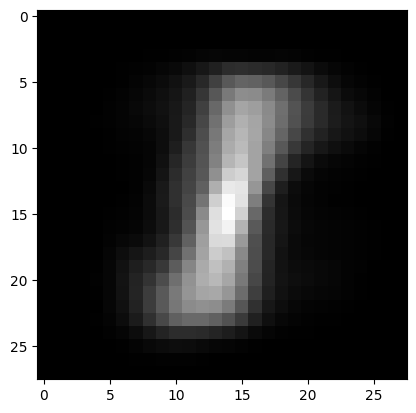

In [14]:
# Look at the centroids for all of the clusters
for i in range(len(clst.cluster_centers_)):
    print("Cluster ID %d centroid" % i)
    plot_digit(clst.cluster_centers_[i])

# Task 2: Varying k in k-Means

For values of k in {2, 10, 15}
* cluster the digits
* print the confusion matrices
* plot the cluster centroids

Note that for k = 2, 2-means must combine distinct digits.  For k = 10 you would hope that it has a cluster for each digit in which that digit is by far the most common.  For k = 15 the expectation is that there may be clusters, for example, for the same digit but different ways of writing it (e.g., 9 with a straight bottom vs. 9 with a curled tail at the bottom).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster ID 0 centroid


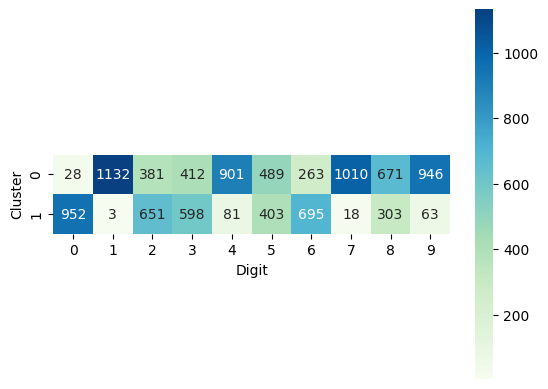

Cluster ID 1 centroid


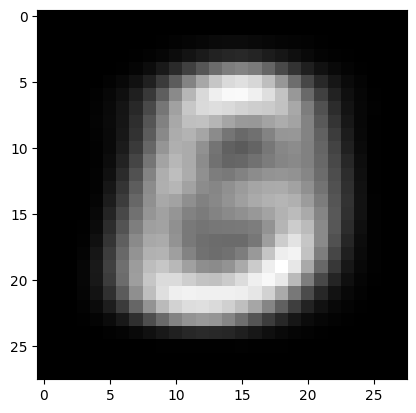

In [15]:
#k = 2
clst = KMeans(n_clusters = 2, init = 'random')
clst.fit(X)
cm = get_cm(clst, y)
plot_cm(cm)
for i in range(len(clst.cluster_centers_)):
    print("Cluster ID %d centroid" % i)
    plot_digit(clst.cluster_centers_[i])

in this case where there are two centroids, numbers that are visually similar will be part of the same centroid.

in centroid 0, the main numbers clustered are 1, 4, 7, and 9. A reason they could be clustered together is because they all visually share a similar solid downward line.

in centroid 1, the main clustered numbers are 0, 2, 3, 6. these numbers are all very curved numbers which would explain why they have been clustered together.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster ID 0 centroid


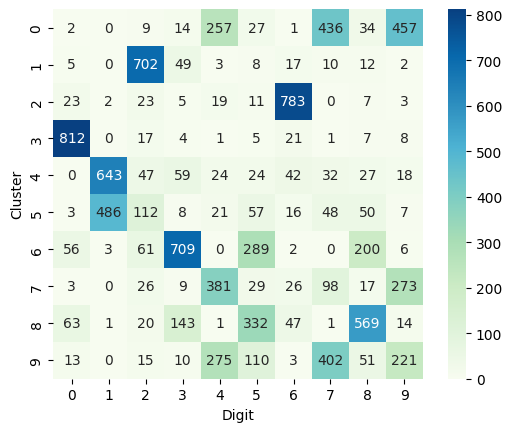

Cluster ID 1 centroid


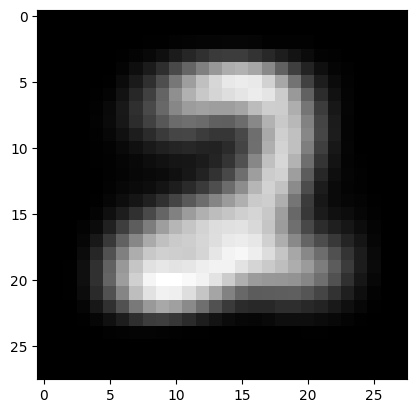

Cluster ID 2 centroid


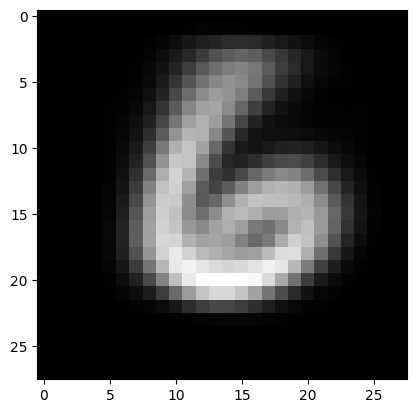

Cluster ID 3 centroid


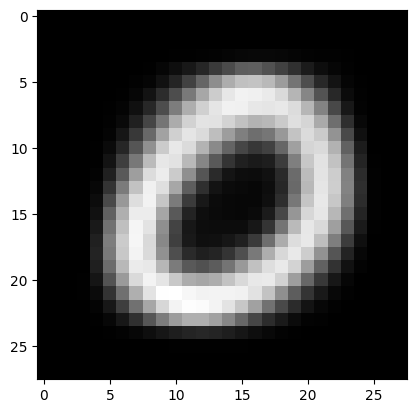

Cluster ID 4 centroid


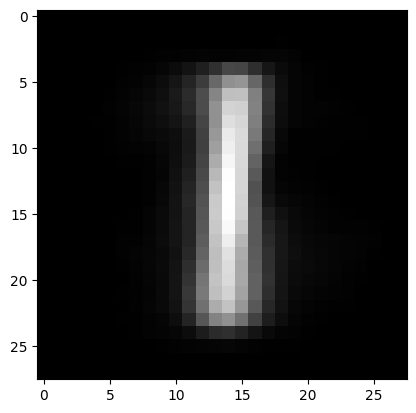

Cluster ID 5 centroid


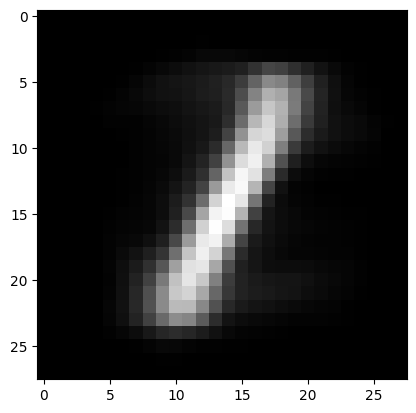

Cluster ID 6 centroid


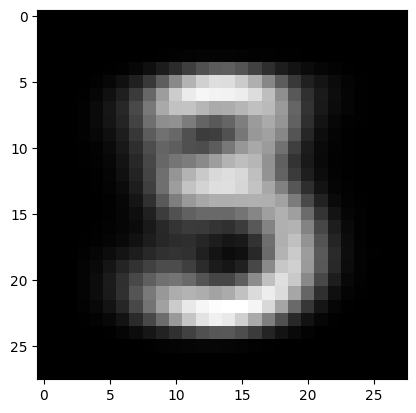

Cluster ID 7 centroid


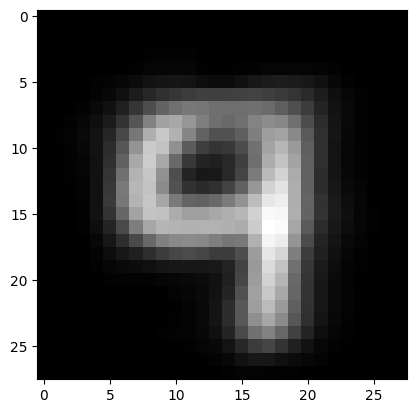

Cluster ID 8 centroid


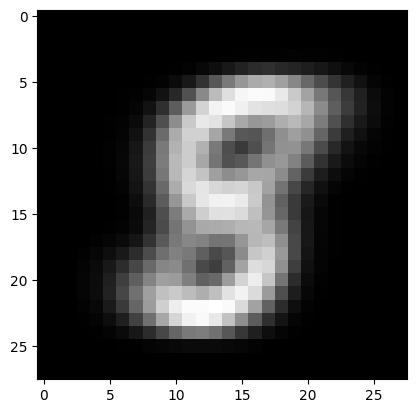

Cluster ID 9 centroid


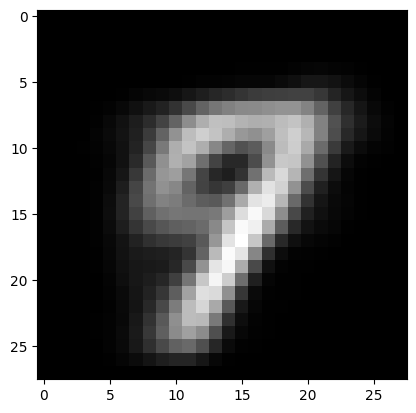

In [16]:
#k = 10
clst = KMeans(n_clusters = 10, init = 'random')
clst.fit(X)
cm = get_cm(clst, y)
plot_cm(cm)
for i in range(len(clst.cluster_centers_)):
    print("Cluster ID %d centroid" % i)
    plot_digit(clst.cluster_centers_[i])

in this case where there are 10 centroids and 10 numbers, we expect there to generaly be one cluster for each number. and when looking at the confustion matrix, you can see this is generally the case. numbers 0, 2, 3, 6, 7, 8, 9 all have one cluster that is ranked higher than all the others. sometimes there are intersting cases like with 1, 4, 5. in the confustion matrix, 4 and 5 dont really have a dedicated centroid that they have been clustered in. the number 1 on the other hand has 2 centroids in which it is clustered. an explanation could be that in the previous example, 1, 4 and 5 were all generally clustered together becasue they were somewhat similar. in this example it could the same case in which they were misclassified.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster ID 0 centroid


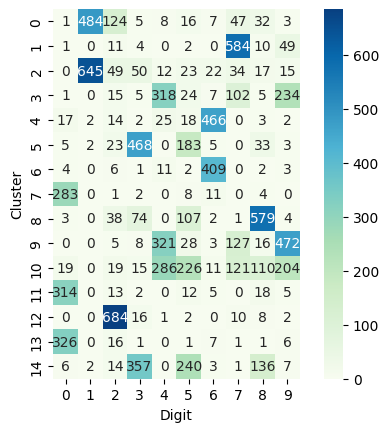

Cluster ID 1 centroid


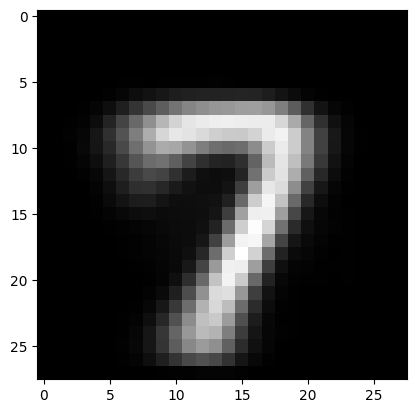

Cluster ID 2 centroid


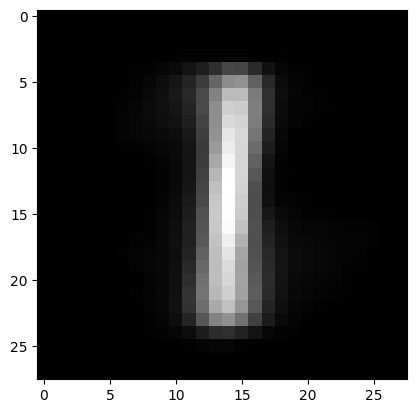

Cluster ID 3 centroid


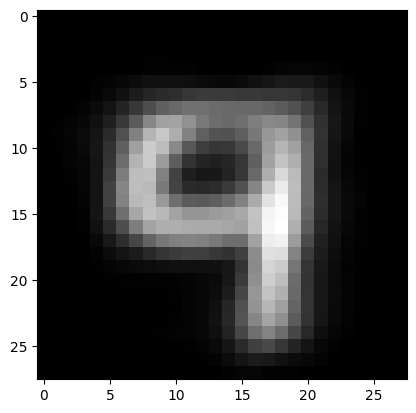

Cluster ID 4 centroid


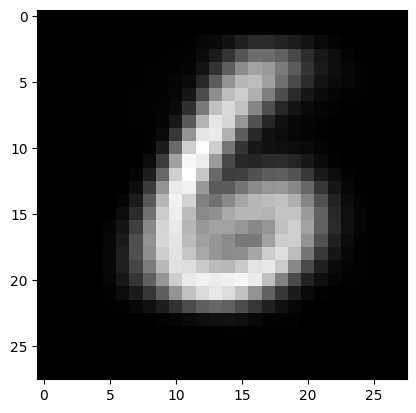

Cluster ID 5 centroid


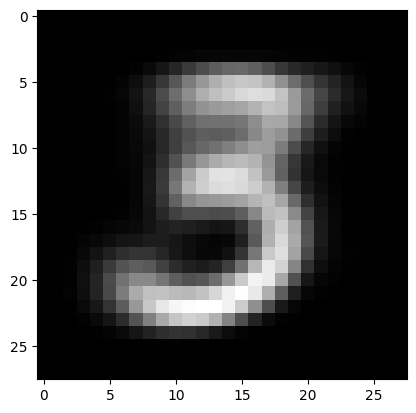

Cluster ID 6 centroid


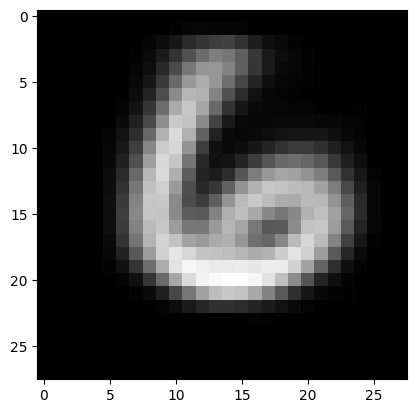

Cluster ID 7 centroid


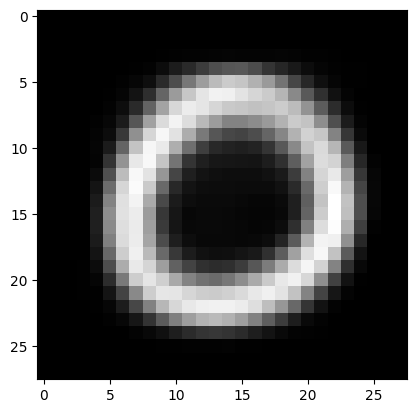

Cluster ID 8 centroid


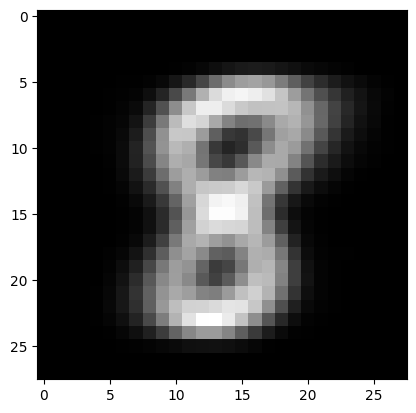

Cluster ID 9 centroid


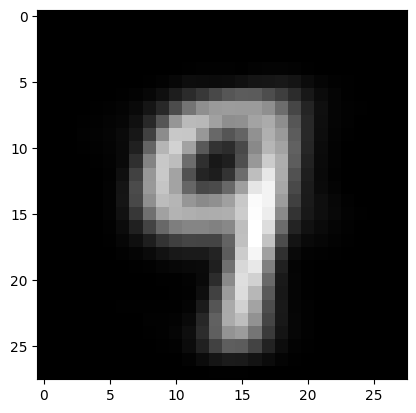

Cluster ID 10 centroid


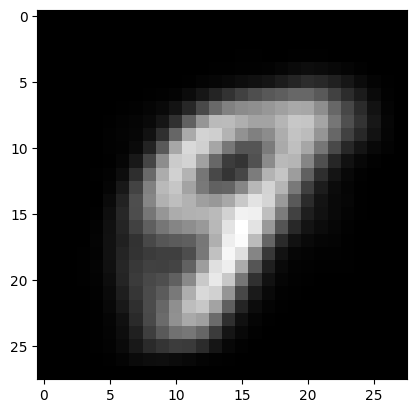

Cluster ID 11 centroid


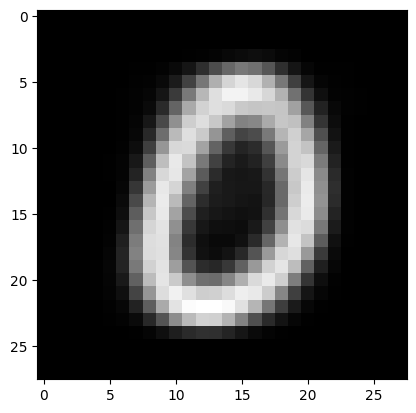

Cluster ID 12 centroid


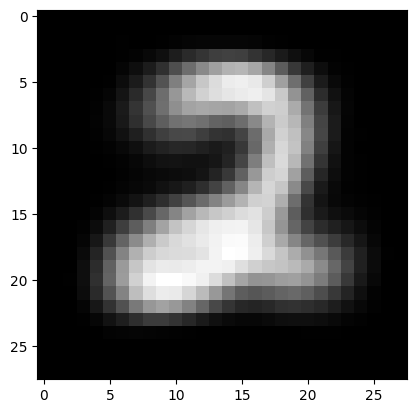

Cluster ID 13 centroid


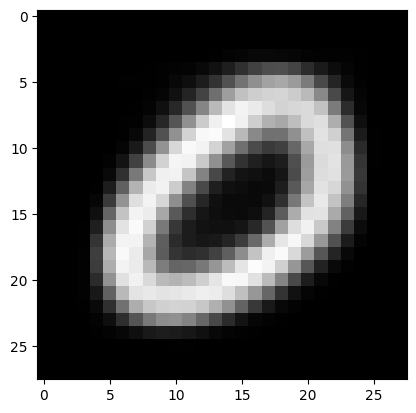

Cluster ID 14 centroid


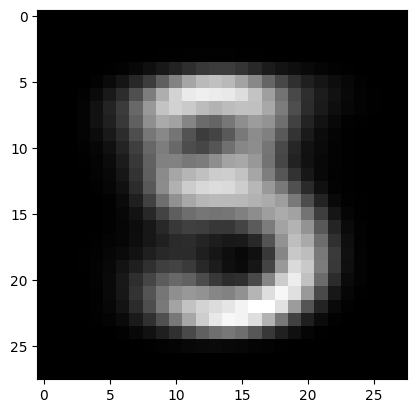

In [17]:
#k = 15
clst = KMeans(n_clusters = 15, init = 'random')
clst.fit(X)
cm = get_cm(clst, y)
plot_cm(cm)
for i in range(len(clst.cluster_centers_)):
    print("Cluster ID %d centroid" % i)
    plot_digit(clst.cluster_centers_[i])

in this case there are 15 centroids, and like the previous example we would expect each centroid to be a cluster for one number. and when you look at the confustion matrix you can see this. each centroid, except for centroid 10, has one number that it mainly clusters. in fact, we can see that the centroid focuses on only one number because each other number in the centroid is clustered far less. since there are more centroids than numbers, some centroids overlap, for instace both centroid 0 and 2 cluster the number 1.

# Task 3: Agglomerative Clustering

Read the scikit documentation on Agglomerative Clustering.  There are two important hyperparameters:
* linkage, which can take on values ‘ward’, ‘complete’, ‘average’, ‘single’
* metric, which can take on values “euclidean”, “l1”, “l2”, “manhattan”, “cosine”

Explore combinations of those hyperparameters with n_clusters = 10 and see how close you can get to the ideal of one majority digit per cluster.  
* Write a couple of paragraphs explaining what you tried, what worked and what didn't with example confusion matrices.  Include an explanation of **why** you think the best results were a result of the hyperparameters chosen in that case.  Note that you may need to dig through the scikit documentation or use the internet to get more information on their effects.

I tried a combination of each linkage and metric, the interesting ones are below. only two of the settings seemed to have come close to working, "euclidean ward" and "cosine complete". these two produced centroids that are around one majority digit per cluster, the prior having a much better majority than the latter.

several of the combinations produced results in which most if not all the clusters are in centroid 0, below are several examples. the linkage "single" produced outputs as such most often but "cosine complete" also produced such a result.

from my observations "euclidean ward" produced the best results. the 'ward' setting minimizes the variance of the clusters being merged and the 'euclidean' setting measures the straight line distance between 2 points in space. these settings make it so clusters that are absolutely closest to each other, creating better clusters that have a majority of one number.

euclidean ward


<Axes: xlabel='Digit', ylabel='Cluster'>

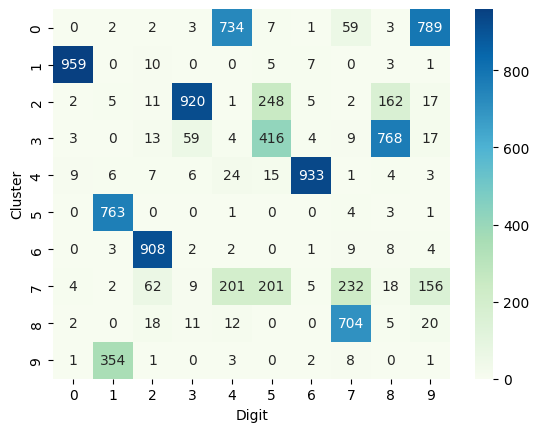

In [21]:
#keep
clst = AgglomerativeClustering(n_clusters = 10, metric='euclidean', linkage='ward')
clst.fit(X)
cm = get_cm(clst, y)
print("euclidean ward")
plot_cm(cm)

euclidean complete


<Axes: xlabel='Digit', ylabel='Cluster'>

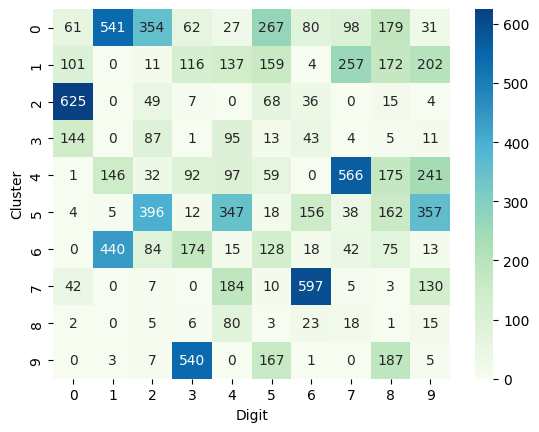

In [37]:
clst2 = AgglomerativeClustering(n_clusters = 10, metric='cosine', linkage='complete')
clst2.fit(X)
cm2 = get_cm(clst2, y)
print("euclidean complete")
plot_cm(cm2)

euclidean average


<Axes: xlabel='Digit', ylabel='Cluster'>

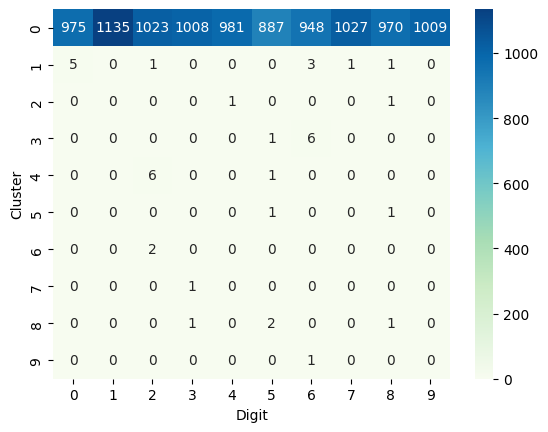

In [36]:
clst3 = AgglomerativeClustering(n_clusters = 10, metric='cosine', linkage='average')
clst3.fit(X)
cm3 = get_cm(clst3, y)
print("euclidean average")
plot_cm(cm3)

euclidean single


<Axes: xlabel='Digit', ylabel='Cluster'>

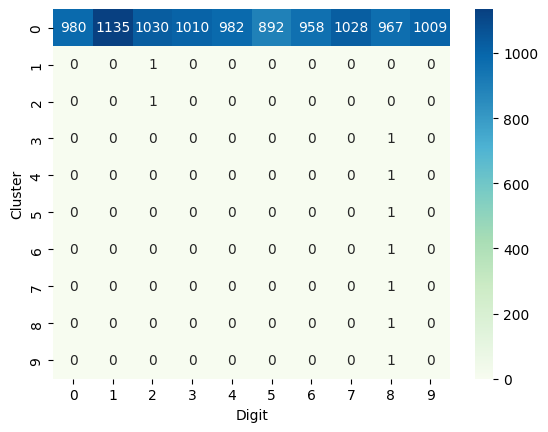

In [28]:
#keep
clst4 = AgglomerativeClustering(n_clusters = 10, metric='l1', linkage='single')
clst4.fit(X)
cm4 = get_cm(clst4, y)
print("euclidean single")
plot_cm(cm4)

euclidean average


<Axes: xlabel='Digit', ylabel='Cluster'>

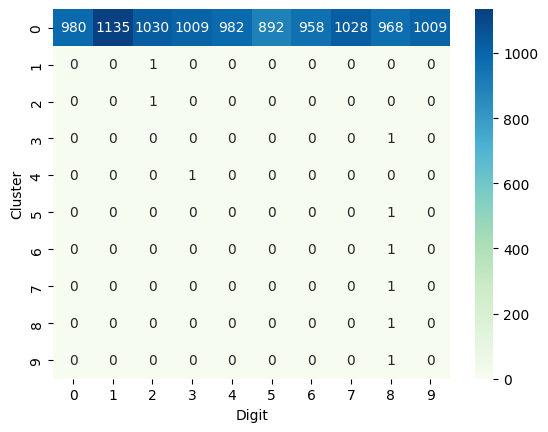

In [29]:
#keep
clst3 = AgglomerativeClustering(n_clusters = 10, metric='l2', linkage='single')
clst3.fit(X)
cm3 = get_cm(clst3, y)
print("euclidean average")
plot_cm(cm3)

euclidean average


<Axes: xlabel='Digit', ylabel='Cluster'>

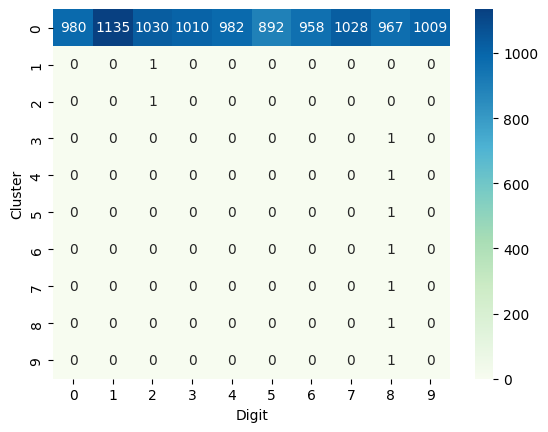

In [34]:
#keep
clst3 = AgglomerativeClustering(n_clusters = 10, metric='manhattan', linkage='single')
clst3.fit(X)
cm3 = get_cm(clst3, y)
print("euclidean average")
plot_cm(cm3)

euclidean average


<Axes: xlabel='Digit', ylabel='Cluster'>

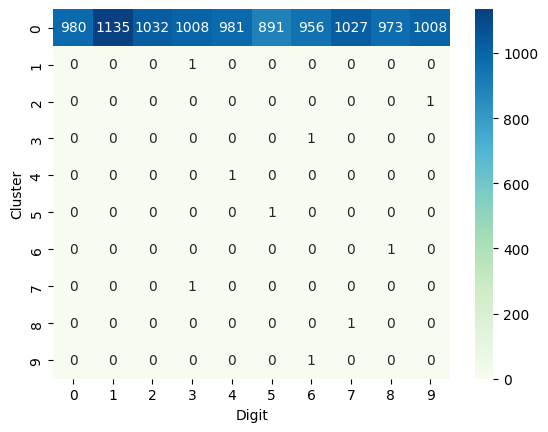

In [35]:
#keep
clst3 = AgglomerativeClustering(n_clusters = 10, metric='cosine', linkage='single')
clst3.fit(X)
cm3 = get_cm(clst3, y)
print("euclidean average")
plot_cm(cm3)